In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('two.csv')

In [5]:
data.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2021,National LGA Name 2021,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20246001,Tas,3,2024,Friday,1:19,Single,No,No,No,...,3,Outer Regional Australia,Launceston and North East,George Town,Arterial Road,No,No,0_to_16,Weekday,Night
1,20244019,SA,3,2024,Friday,3:25,Single,No,Yes,No,...,45,Major Cities of Australia,Adelaide - West,Port Adelaide Enfield,Arterial Road,No,No,40_to_64,Weekday,Night
2,20241066,NSW,3,2024,Friday,5:00,Single,No,No,No,...,58,Inner Regional Australia,Richmond - Tweed,Richmond Valley,Local Road,No,No,40_to_64,Weekday,Night
3,20241072,NSW,3,2024,Friday,5:00,Multiple,No,No,No,...,49,Major Cities of Australia,Sydney - Ryde,Ryde,Arterial Road,No,No,40_to_64,Weekday,Night
4,20241048,NSW,3,2024,Friday,9:00,Multiple,No,No,No,...,87,Major Cities of Australia,Illawarra,Shellharbour,Collector Road,No,No,75_or_older,Weekday,Day


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31657 entries, 0 to 31656
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       31657 non-null  int64 
 1   State                          31657 non-null  object
 2   Month                          31657 non-null  int64 
 3   Year                           31657 non-null  int64 
 4   Dayweek                        31657 non-null  object
 5   Time                           31638 non-null  object
 6   Crash Type                     31657 non-null  object
 7   Bus Involvement                31657 non-null  object
 8   Heavy Rigid Truck Involvement  31657 non-null  object
 9   Articulated Truck Involvement  31657 non-null  object
 10  Speed Limit                    31657 non-null  object
 11  Road User                      31657 non-null  object
 12  Gender                         31657 non-null  object
 13  A

In [7]:
df = data

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2417/3012160896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = pd.to_datetime(df_filtered['Time'],).dt.hour


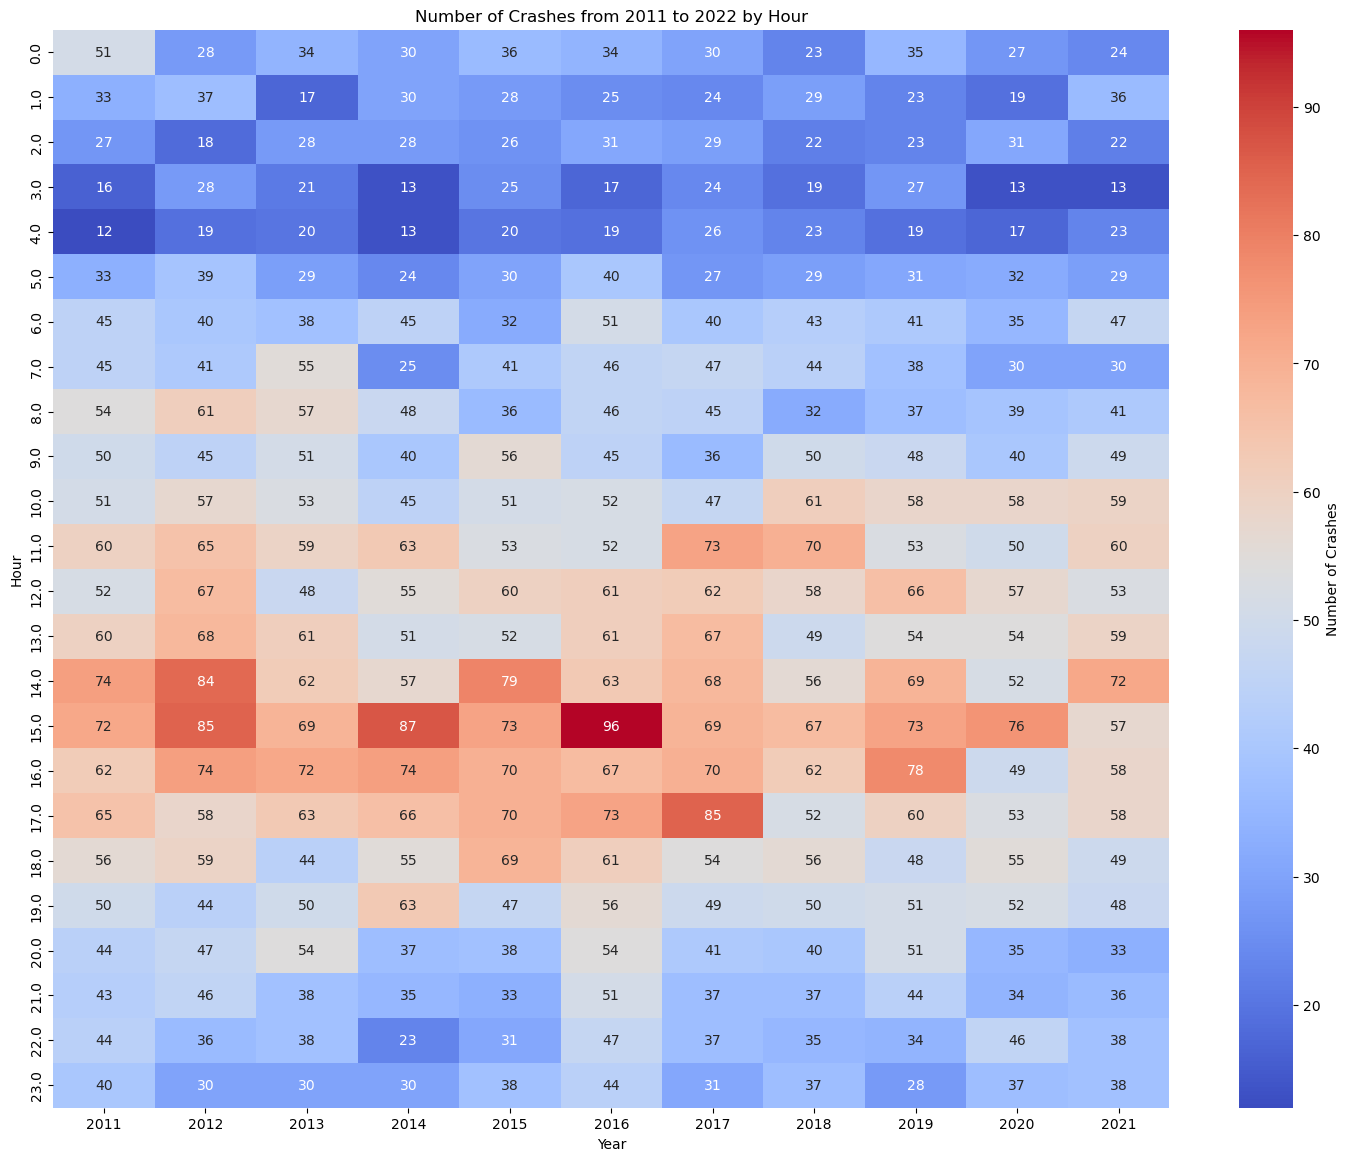

In [23]:
df_filtered = df[(df['Year'] >= 2011) & (df['Year'] <= 2021)]
df_filtered['Hour'] = pd.to_datetime(df_filtered['Time'],).dt.hour
df_grouped = df_filtered.groupby(['Year', 'Hour']).size().reset_index(name='Crash Count')
pivot_table = df_grouped.pivot('Hour', 'Year', 'Crash Count')
plt.figure(figsize=(18, 14))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", cbar_kws={'label': 'Number of Crashes'})
plt.title('Number of Crashes from 2011 to 2022 by Hour')
plt.xlabel('Year')
plt.ylabel('Hour')
plt.show()


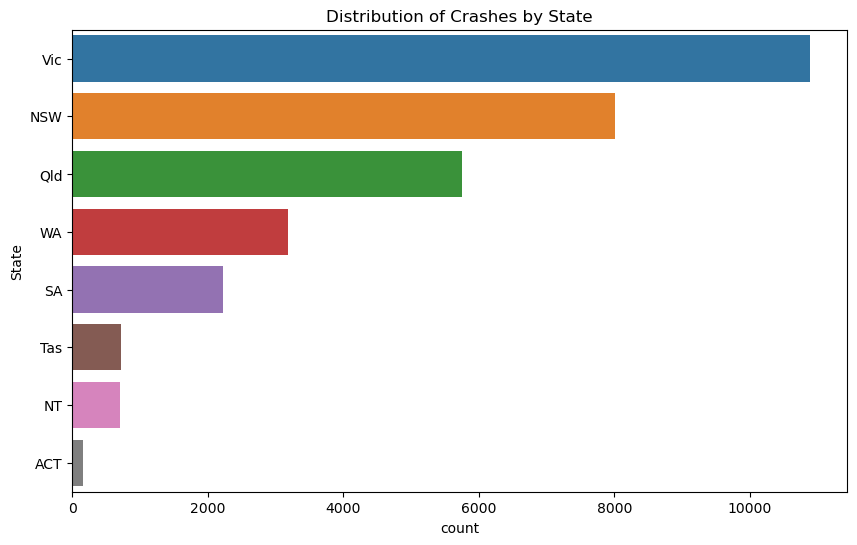

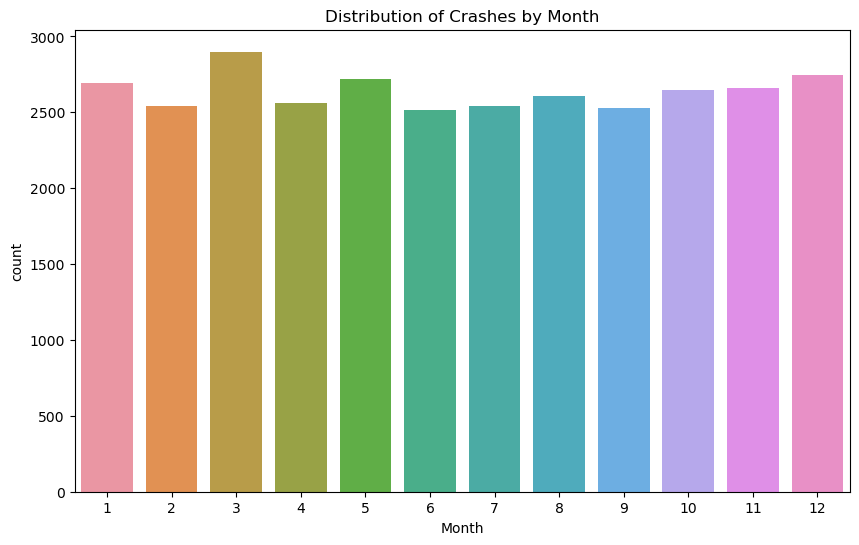

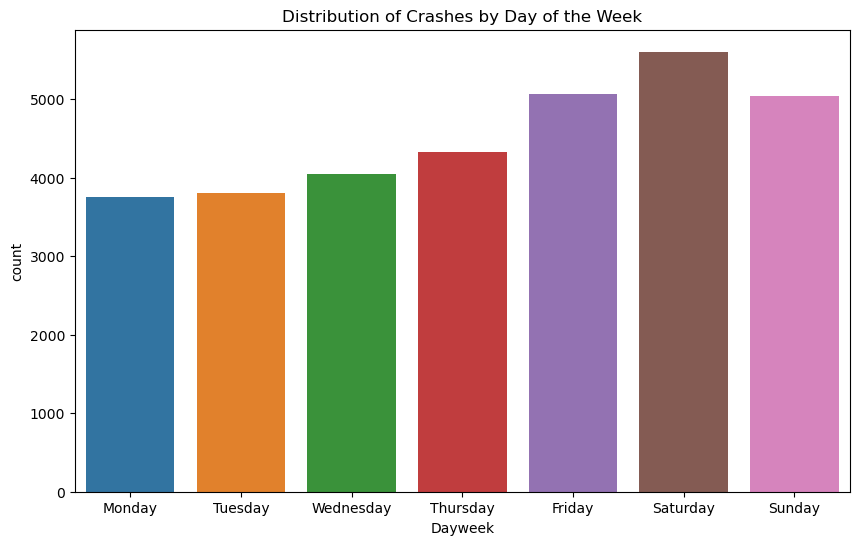

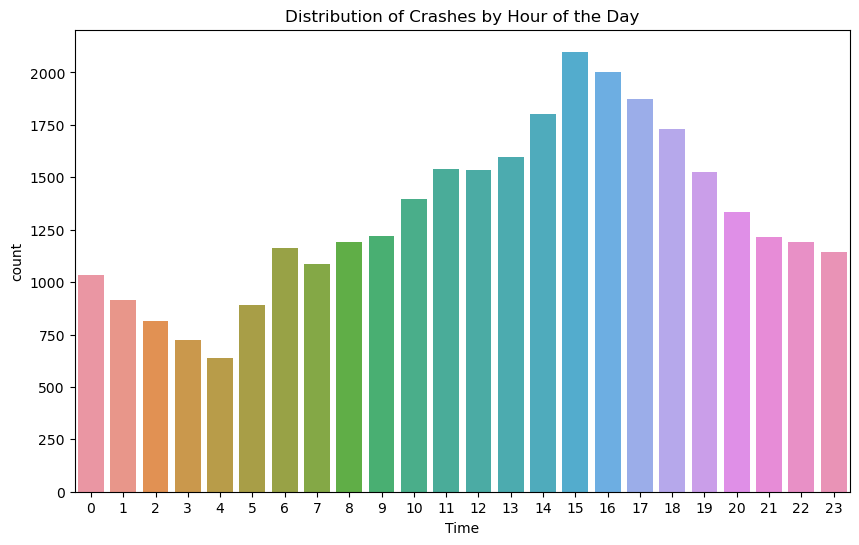

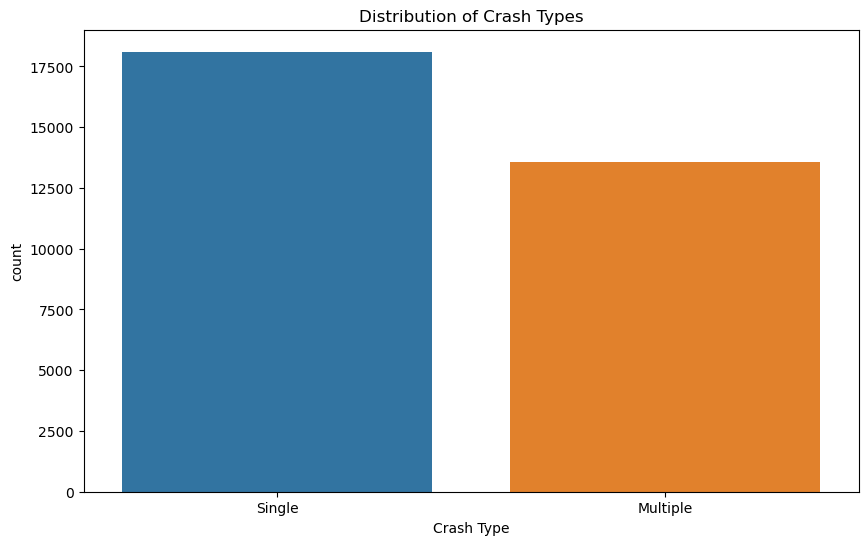

In [5]:


data.fillna(method='ffill', inplace=True)

data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(y='State', data=data, order=data['State'].value_counts().index)
plt.title('Distribution of Crashes by State')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=data)
plt.title('Distribution of Crashes by Month')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Dayweek', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Crashes by Day of the Week')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Time', data=data)
plt.title('Distribution of Crashes by Hour of the Day')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Crash Type', data=data)
plt.title('Distribution of Crash Types')
plt.show()


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31657 entries, 0 to 31656
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       31657 non-null  int64 
 1   State                          31657 non-null  object
 2   Month                          31657 non-null  int64 
 3   Year                           31657 non-null  int64 
 4   Dayweek                        31657 non-null  object
 5   Time                           31657 non-null  int64 
 6   Crash Type                     31657 non-null  object
 7   Bus Involvement                31657 non-null  object
 8   Heavy Rigid Truck Involvement  31657 non-null  object
 9   Articulated Truck Involvement  31657 non-null  object
 10  Speed Limit                    31657 non-null  object
 11  Road User                      31657 non-null  object
 12  Gender                         31657 non-null  object
 13  A

In [7]:
df=data

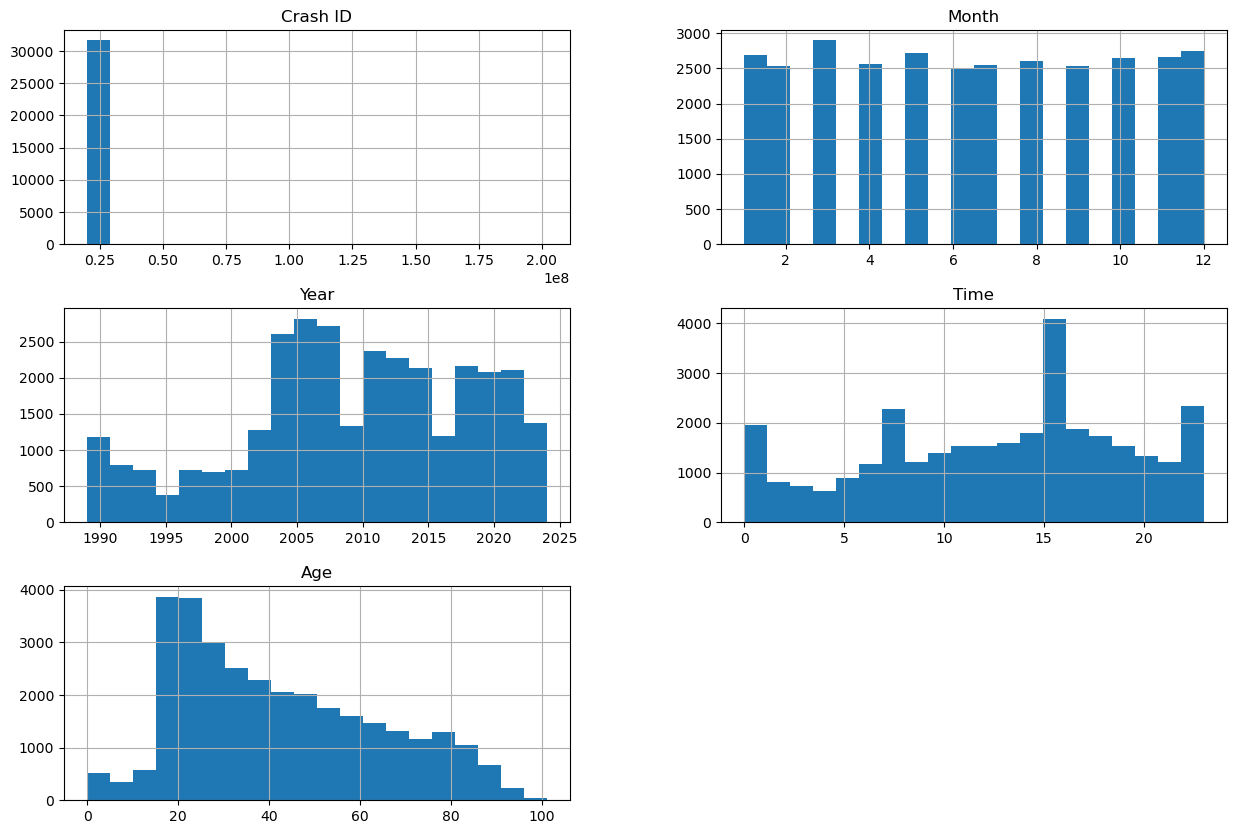

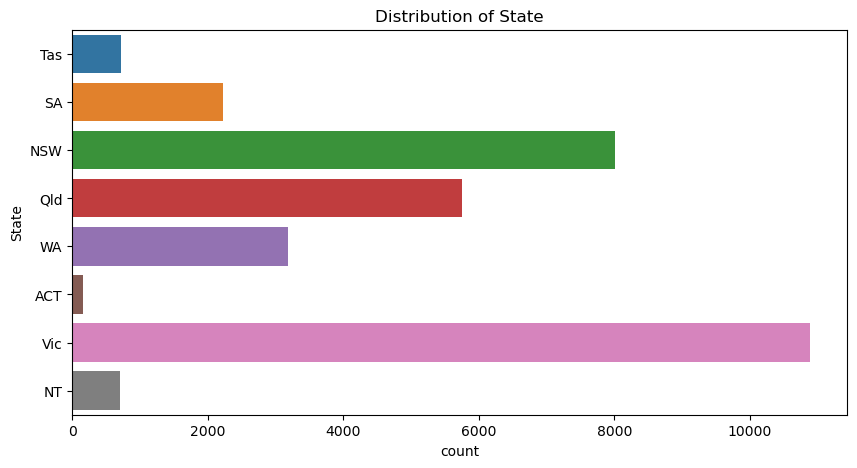

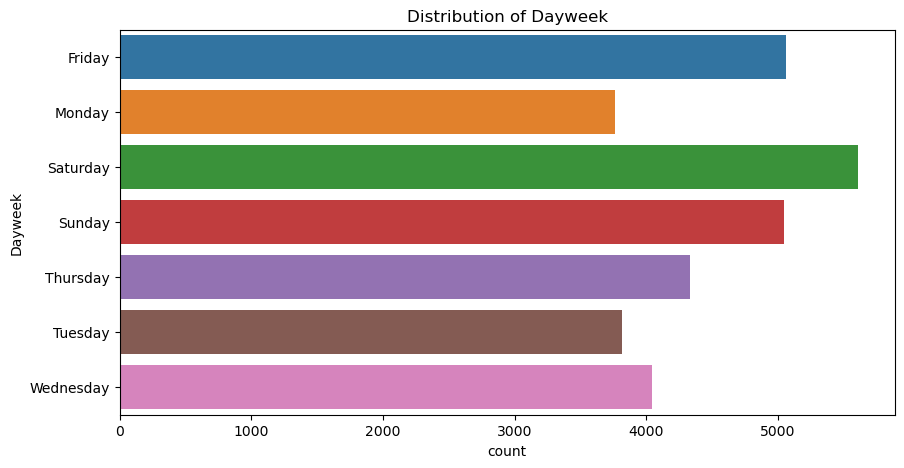

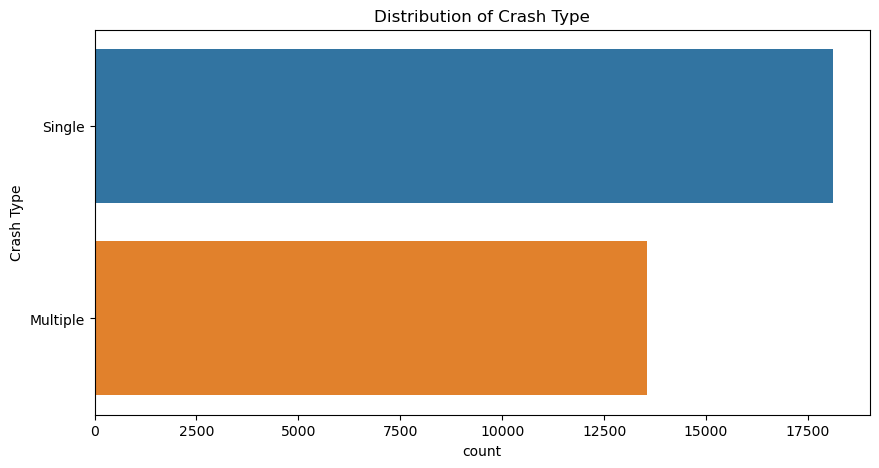

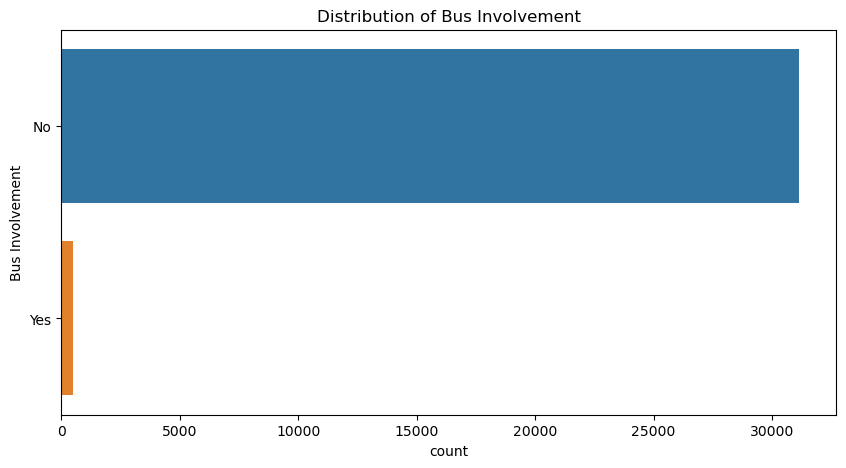

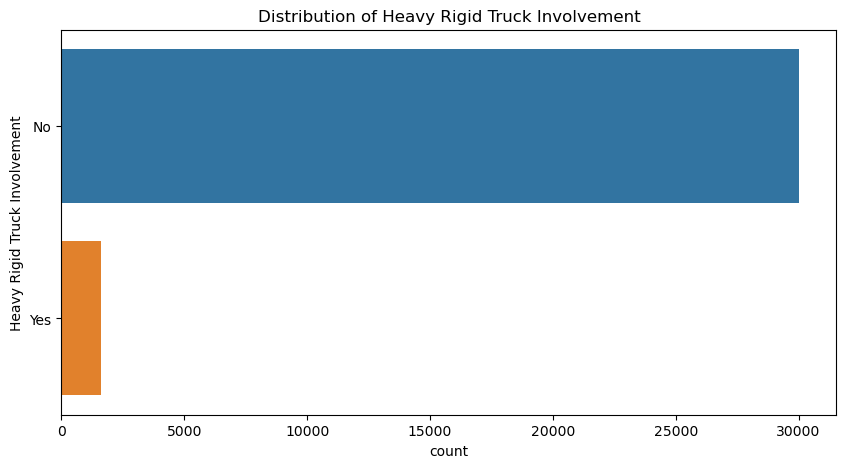

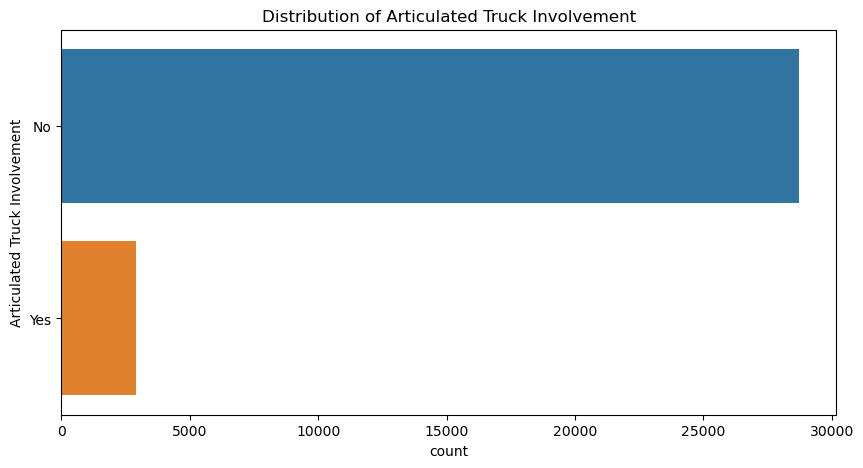

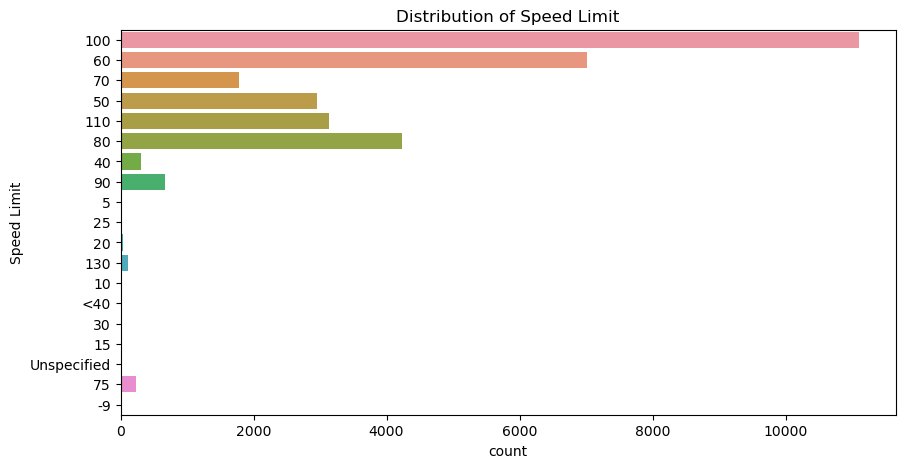

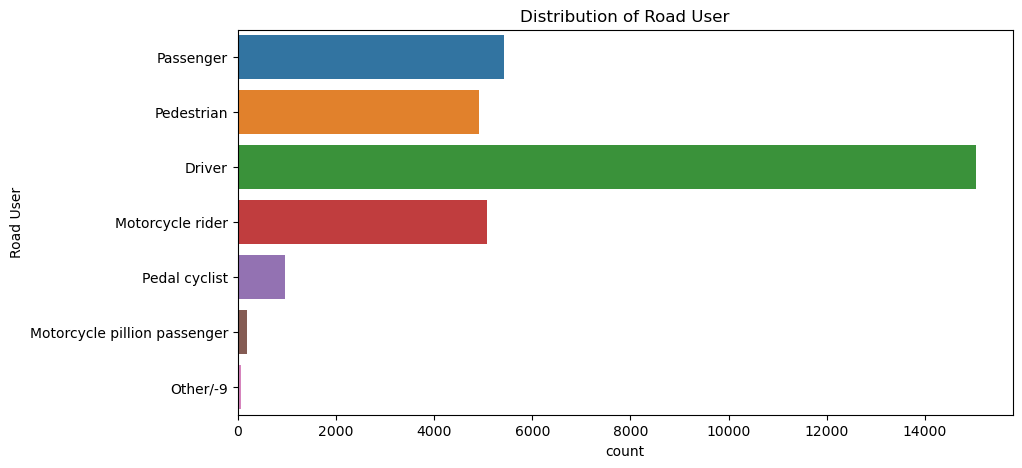

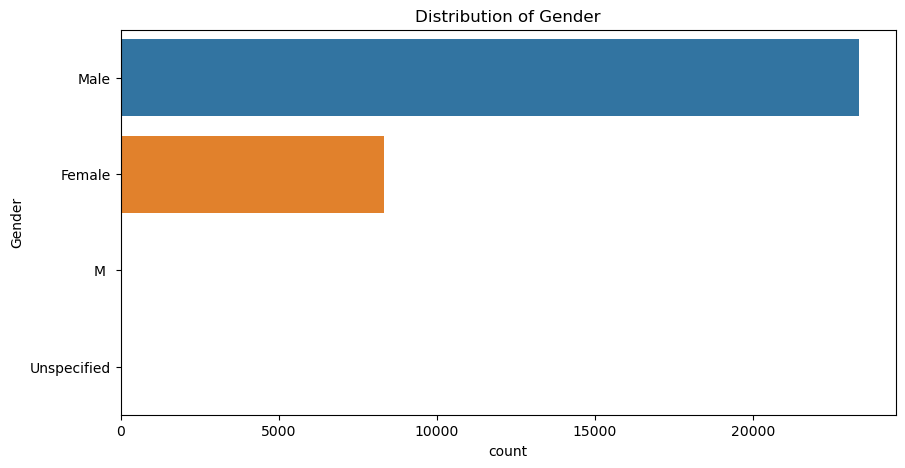

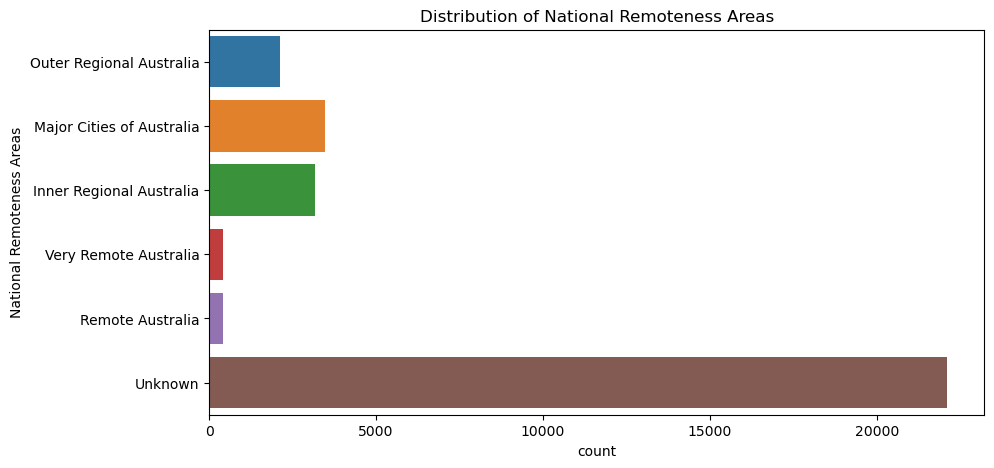

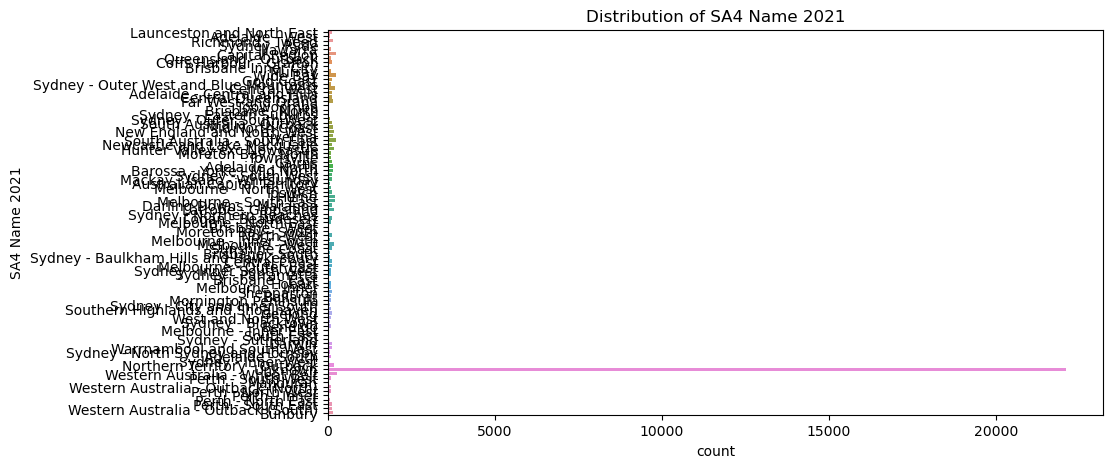

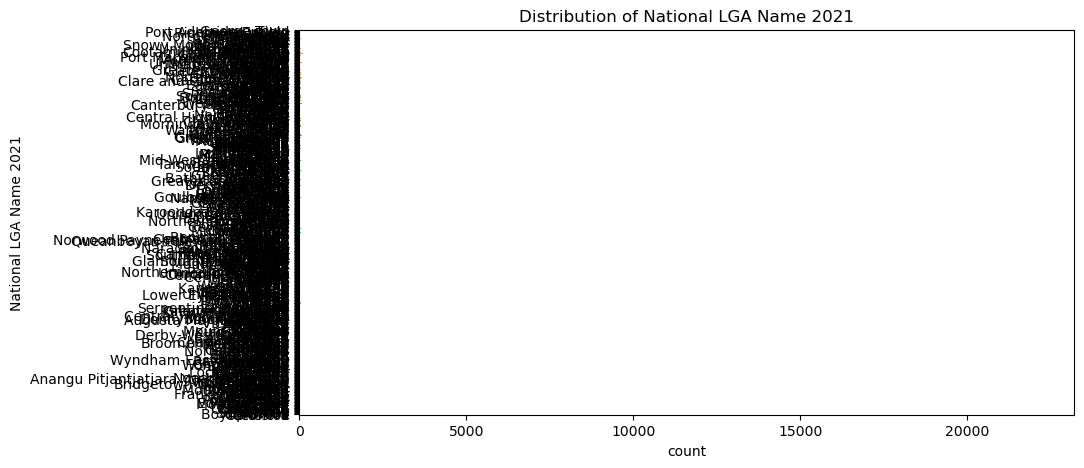

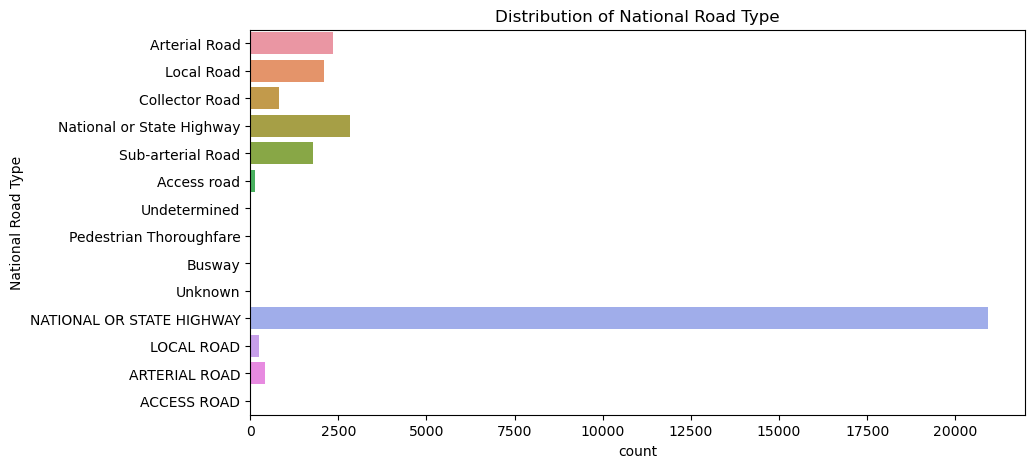

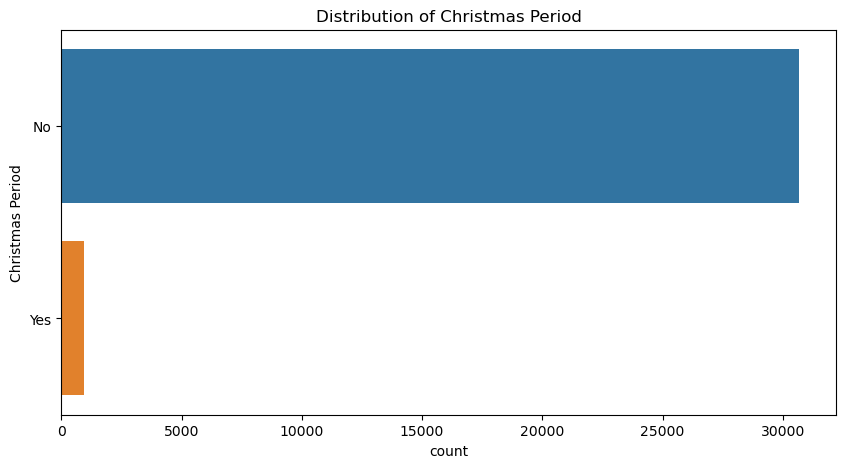

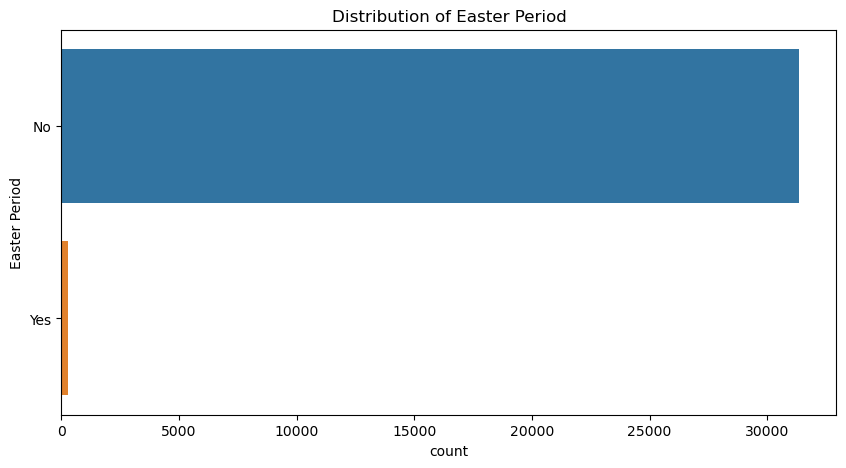

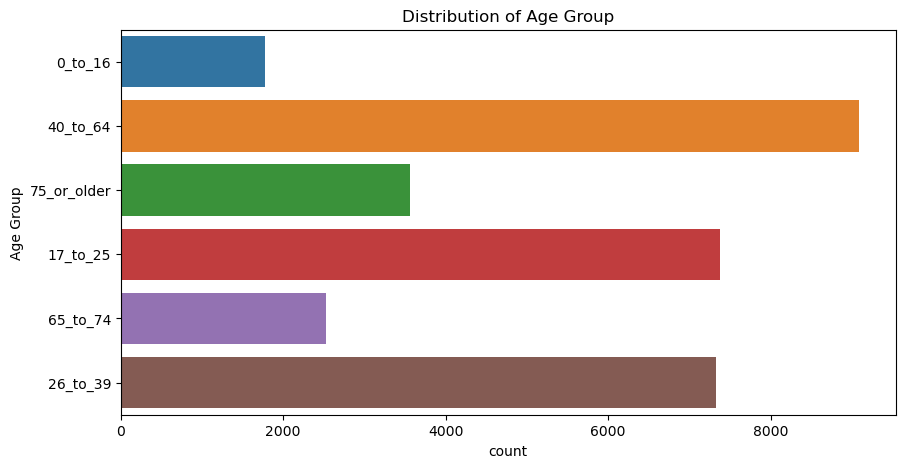

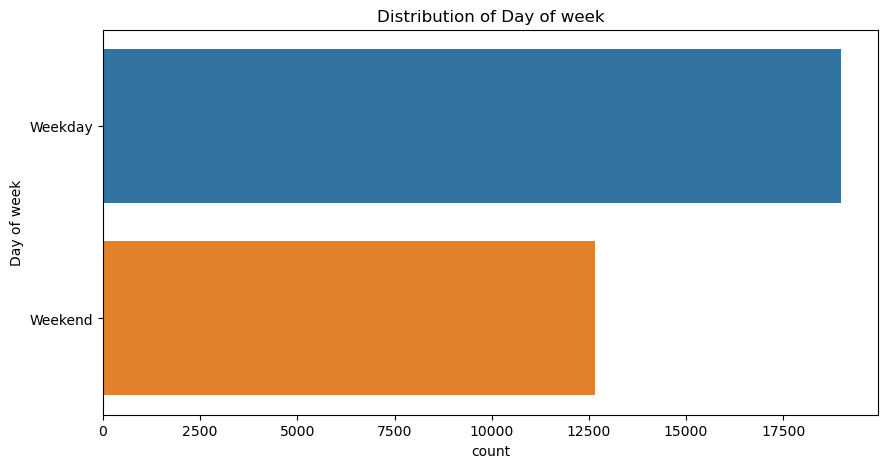

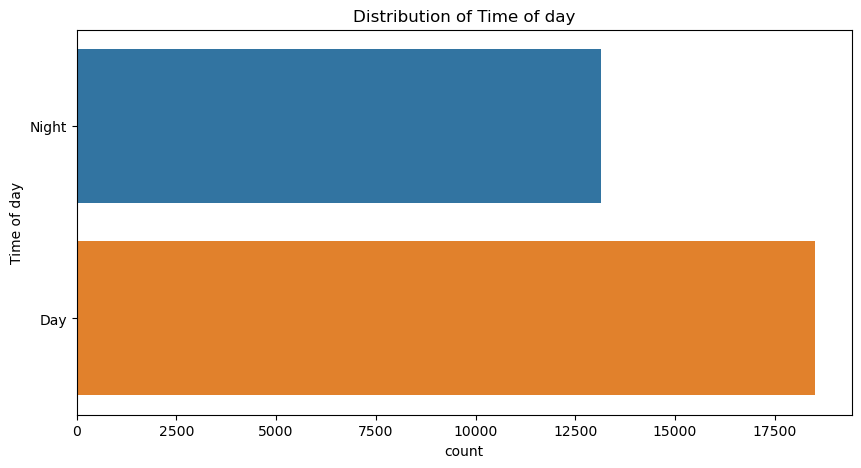

In [9]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

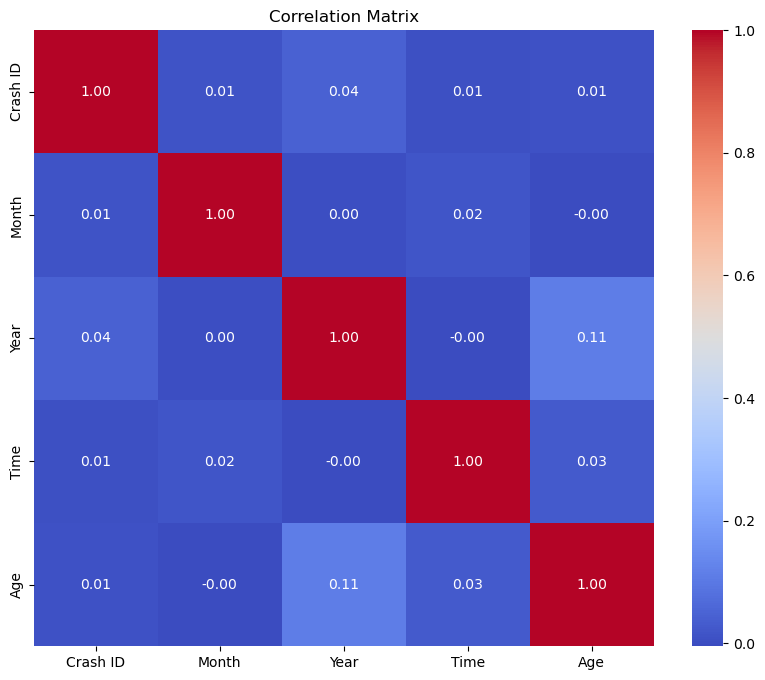

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

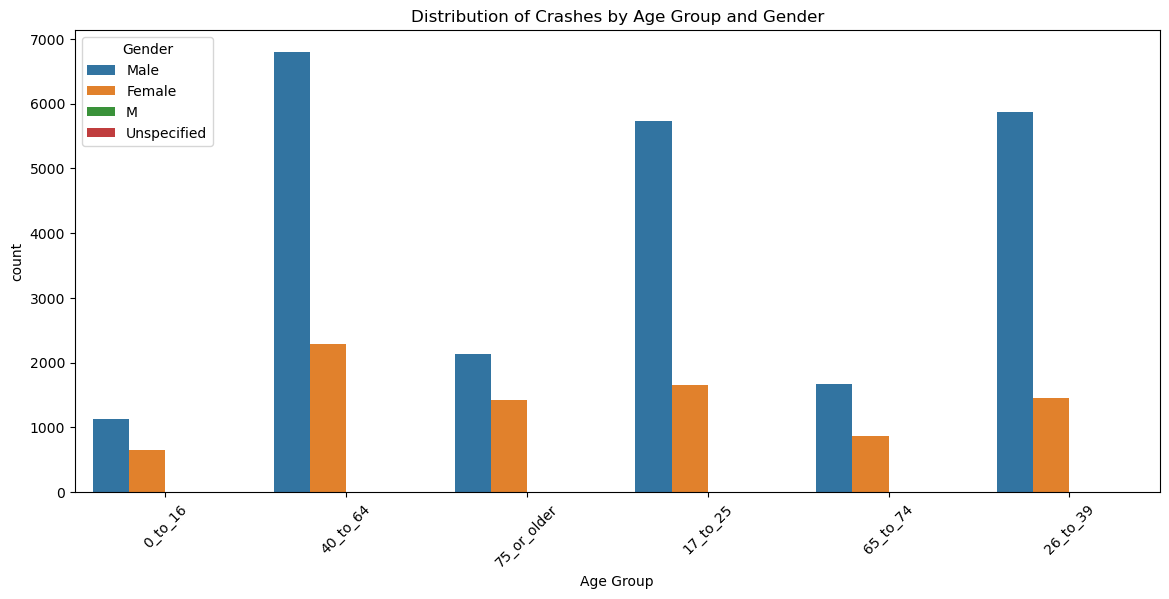

In [11]:
plt.figure(figsize=(14, 6))
sns.countplot(x='Age Group', hue='Gender', data=df)
plt.title("Distribution of Crashes by Age Group and Gender")
plt.xticks(rotation=45)
plt.show()

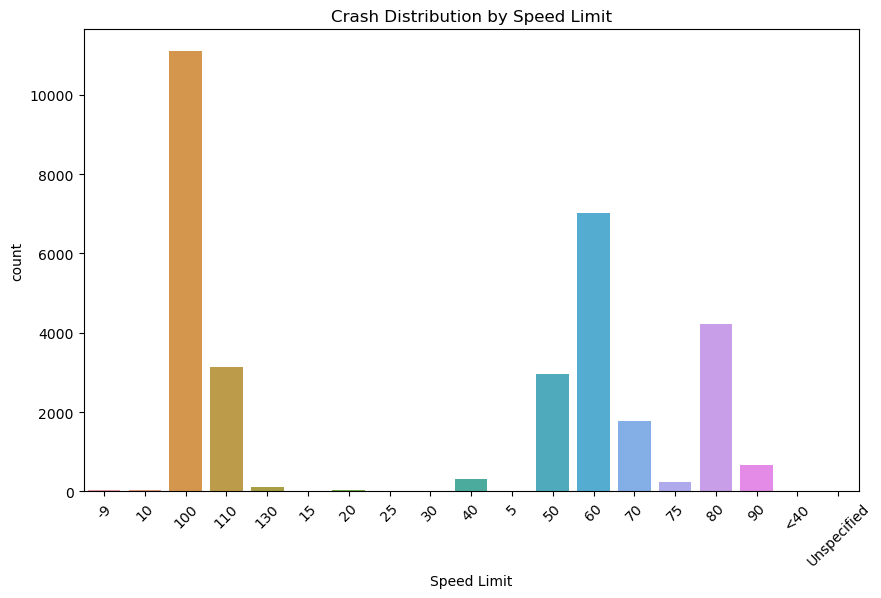

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Speed Limit', data=df, order=sorted(df['Speed Limit'].unique()))
plt.title("Crash Distribution by Speed Limit")
plt.xticks(rotation=45)
plt.show()

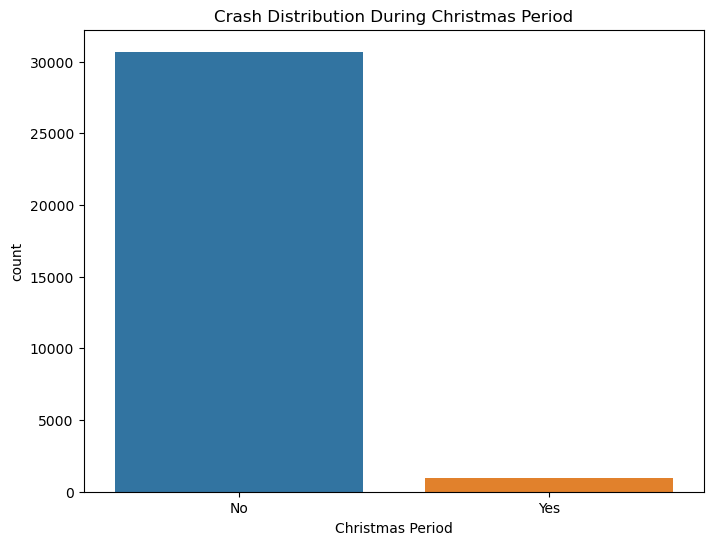

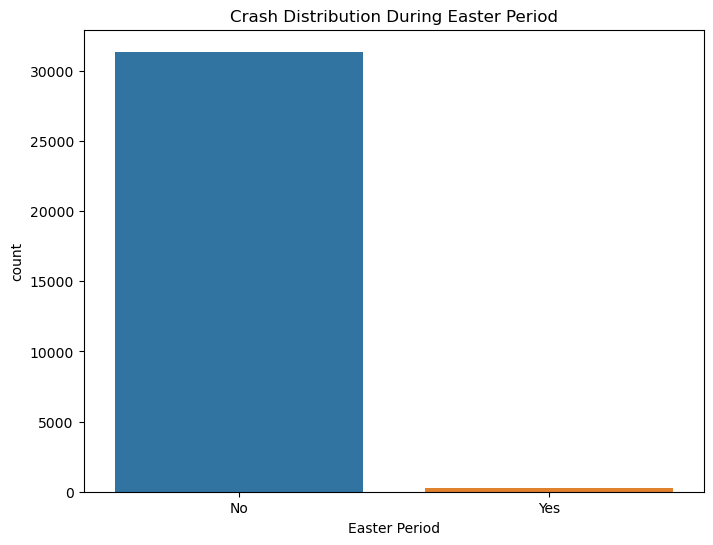

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Christmas Period', data=df)
plt.title("Crash Distribution During Christmas Period")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Easter Period', data=df)
plt.title("Crash Distribution During Easter Period")
plt.show()

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# فرض کنید df داده‌های اصلی است
# ایجاد متغیر هدف به صورت باینری

def severity(row):
    if row['Crash Type'] in ['Fatal', 'Serious Injury']:
        return 1
    else:
        return 0

df['Severity'] = df.apply(severity, axis=1)

# انتخاب ویژگی‌ها
features = ['Month', 'Year', 'Day of week', 'Time of day', 'Bus Involvement',
            'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement',
            'Speed Limit', 'Gender', 'Age', 'National Remoteness Areas',
            'SA4 Name 2021', 'National LGA Name 2021', 'National Road Type',
            'Christmas Period', 'Easter Period']

# تبدیل ویژگی‌های دسته‌بندی به عددی
df_encoded = pd.get_dummies(df[features], drop_first=True)

# هدف
target = df['Severity']

# تقسیم به مجموعه‌های آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)

# استانداردسازی داده‌ها
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# مدل‌سازی با RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# پیش‌بینی
y_pred = model.predict(X_test)

# ارزیابی مدل
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[6332]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6332

    accuracy                           1.00      6332
   macro avg       1.00      1.00      1.00      6332
weighted avg       1.00      1.00      1.00      6332


Accuracy: 1.0


In [2]:
df = data

NameError: name 'data' is not defined

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[(df['Year'] >= 2011) & (df['Year'] <= 2022)]


NameError: name 'df' is not defined